<a name="0"></a>
### Оглавление:

[1. Файл с данными, общая информация](#1)

[2. Подготовка данных](#2)

[3. Анализ данных](#3)

[4. Проверка гипотез](#4)

[5. Вывод](#5)

## Определение перспективного тарифа для телеком компании

### Цель проекта:

Определить какой тариф выгоднее: «smart» и «ultra»?

### Описание проекта:

Проведен анализ данных тарифных планов «smart» и «ultra» компании «Мегалайн» основываясь выборке клиентов за 2018 год с целью определения наиболее прибыльного

Основные этапы проекта:
- анализ данных на предмет ошибок и их устранение
- приведение данных к требуемым форматам и группировка по признакам
- статистический анализ и проверка гипотез
- сравнение
- вывод о прибыльности


Данные для анализа:


1. информация о пользователях **df_users** 

    1.1 user_id — уникальный идентификатор пользователя
    
    1.2 first_name — имя пользователя
    
    1.3 last_name — фамилия пользователя
    
    1.4 age — возраст пользователя (годы)
    
    1.5 reg_date — дата подключения тарифа (день, месяц, год)
    
    1.6 churn_date — дата прекращения пользования тарифом
    
    1.7 city — город проживания пользователя
    
    1.8 tariff — название тарифного плана
    
    
2. информация о звонках **df_calls**

    2.1 id — уникальный номер звонка
    
    2.2 call_date — дата звонка
    
    2.3 duration — длительность звонка в минутах
    
    2.4 user_id — идентификатор пользователя
    
    
3. информация о сообщениях **df_messages**:

    3.1 id — уникальный номер сообщения
    
    3.2 message_date — дата сообщения
    
    3.3 user_id — идентификатор пользователя, отправившего сообщение
    
    
4. информация об интернет-сессиях **df_internet**:

    4.1 id — уникальный номер сессии
    
    4.2 mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    
    4.3 session_date — дата интернет-сессии
    
    4.4 user_id — идентификатор пользователя
    
    
5. информация о тарифах **df_tariffs**:

    5.1 tariff_name — название тарифа
    
    5.2 rub_monthly_fee — ежемесячная абонентская плата в рублях
    
    5.3 minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    
    5.4 messages_included — количество сообщений в месяц, включённых в абонентскую плату
    
    5.5 mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    
    5.6 rub_per_minute — стоимость минуты разговора сверх тарифного пакета
    
    5.7 rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    
    5.8 rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

<a name="1"></a>
[Назад к оглавлению](#0)

## 1. Файл с данными, общая информация 


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [4]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [6]:
df_users = pd.read_csv('/datasets/users.csv')

In [7]:
df_calls.duplicated().sum()

0

In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Датасет df_calls содержит 202607 записей

Типы данных *int64, float64, object*

In [10]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [11]:
df_internet.duplicated().sum()

0

In [12]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Датасет df_internet содержит 149396 записей

Типы данных *int64, object, float64* (после изменения)

In [13]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
df_messages.duplicated().sum()

0

In [15]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Датасет df_messages содержит 123036 записей

Типы данных *int64, object* и *datetime* (после изменения)

Категориальные и количественные данные

In [16]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [18]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
df_users.duplicated().sum()

0

In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


###### Вывод

1. Данные содержат от 2х до 202607 записей

2. Типы данных *int64, float64, object* и *datetime* (после изменения)

3. Категориальные и количественные данные

4. Полные дубликаты отсутствуют

5. **df_calls.call_date**, **df_internet.session_date**, **df_messages.message_date**, **df_users.reg_date** - тип данных object
для корректного анализа изменим на тип datetime

6. **df_users.churn_date** - пропуски типа NAN 462шт. заменим на "1970-01-01" - означает, что абонент пользуется номером. 

<a name="2"></a>
[Назад к оглавлению](#0)

## 2. Подготовка данных


* Приведение данных к нужным типам

Округляем время разговора в минутах и трафик интернета в мегабайтах в большую сторону до целого - политика предоставления услуг "Мегалайн"

In [21]:
df_calls.duration = np.ceil(df_calls.duration).astype(int)

In [22]:
df_internet.mb_used = np.ceil(df_internet.mb_used).astype(int)

тип object для корректного анализа изменяем на тип datetime

In [23]:
df_calls.call_date = pd.to_datetime(df_calls.call_date, format='%Y-%m-%dT%H:%M:%S')

In [24]:
df_messages.message_date = pd.to_datetime(df_messages.message_date, format='%Y-%m-%dT%H:%M:%S')

In [25]:
df_internet.session_date = pd.to_datetime(df_internet.session_date, format='%Y-%m-%dT%H:%M:%S')

In [26]:
df_users.reg_date = pd.to_datetime(df_users.reg_date, format='%Y-%m-%dT%H:%M:%S')

<a name="8"></a>

пропуски типа NaN 462шт. заменяем на "0" - отображается в системе Unix-время 1970-01-01 и означает, что абонент пользуется номером

In [27]:
df_users.churn_date = df_users.churn_date.fillna(0)

In [28]:
df_users.churn_date = pd.to_datetime(df_users.churn_date, format='%Y-%m-%dT%H:%M:%S')

* Поиск ошибок в данных

**df_calls**

In [29]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


In [30]:
df_calls.query('duration == 0').duration.count() / len(df_calls) * 100

19.551644316336553

Почти 20% звонков имеют длительность 0 сек. Вероятно, это пропущенные, сброшенные звонки или подобного рода короткие соединения. Не удяляем и оставляем в таком виде для анализа, что бы сохранить данные

**df_internet**

In [31]:
df_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.622098,1252.099842
std,278.387019,144.050823
min,0.000000,1000.000000
25%,139.000000,1130.000000
50%,349.000000,1251.000000
75%,560.000000,1380.000000
max,1725.000000,1499.000000


**df_users**

In [32]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


* количество звонков и израсходованных минут разговора по месяцам для каждого абонента

In [33]:
df_calls['month_date'] = df_calls.call_date.astype('datetime64[M]')

In [34]:
df_calls_total = df_calls.pivot_table(index=['user_id', 'month_date'], values='duration', aggfunc=['count', 'sum']).reset_index()

In [35]:
df_calls_total.columns = ['user_id', 'month_date', 'calls_count', 'calls_sum']

* количество отправленных сообщений по месяцам для каждого абонента

In [36]:
df_messages['month_date'] = df_messages.message_date.astype('datetime64[M]') 

In [37]:
df_messages_total = df_messages.pivot_table(index = ['user_id', 'month_date'], values = 'id', aggfunc = 'count').reset_index()

In [38]:
df_messages_total.columns = ['user_id', 'month_date', 'messages']

* объем израсходованного интернет-трафика по месяцам для каждого абонента

In [39]:
df_internet['month_date'] = df_internet.session_date.astype('datetime64[M]')

<div class="alert alert-info"> 

v1
      
* заменил метод df.month на astype('datetime64[M]') в таблицах **df_calls**, **df_messages** и **df_internet**
        
</div>

In [40]:
df_internet_total = df_internet.pivot_table(index = ['user_id', 'month_date'], values = 'mb_used', aggfunc = 'sum').reset_index()

In [41]:
df_internet_total.columns = ['user_id', 'month_date', 'mb_used']

Для анализа всех тарифов соединим **df_calls_total**, **df_messages_total**, **df_internet_total**

In [42]:
df_calls_messages = df_calls_total.merge(df_messages_total, on = ['user_id', 'month_date'], how = 'outer')

In [43]:
df_calls_messages_internet = df_calls_messages.merge(df_internet_total, on = ['user_id', 'month_date'], how = 'outer')

In [44]:
df = df_users.merge(df_calls_messages_internet, on = 'user_id', how = 'right')

In [45]:
df_calls_messages_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   month_date   3214 non-null   datetime64[ns]
 2   calls_count  3174 non-null   float64       
 3   calls_sum    3174 non-null   float64       
 4   messages     2717 non-null   float64       
 5   mb_used      3203 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 175.8 KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   age          3214 non-null   int64         
 2   churn_date   3214 non-null   datetime64[ns]
 3   city         3214 non-null   object        
 4   first_name   3214 non-null   object        
 5   last_name    3214 non-null   object        
 6   reg_date     3214 non-null   datetime64[ns]
 7   tariff       3214 non-null   object        
 8   month_date   3214 non-null   datetime64[ns]
 9   calls_count  3174 non-null   float64       
 10  calls_sum    3174 non-null   float64       
 11  messages     2717 non-null   float64       
 12  mb_used      3203 non-null   float64       
dtypes: datetime64[ns](3), float64(4), int64(2), object(4)
memory usage: 351.5+ KB


Записи по пользованию связью в **df_users** учтены все

<a name="7"></a>

Пропуски типа NaN в звонках, сообщениях и интернете заменим на 0 - это означает, что абонент видом связи в определенный месяц не пользовался. Значения количества и длительности звонков и количества сообщениий округлим до целого числа для лучшего восприятия.

In [47]:
df = df.fillna(0)

In [48]:
df[['calls_count', 'calls_sum', 'messages']] = df[['calls_count', 'calls_sum', 'messages']].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   age          3214 non-null   int64         
 2   churn_date   3214 non-null   datetime64[ns]
 3   city         3214 non-null   object        
 4   first_name   3214 non-null   object        
 5   last_name    3214 non-null   object        
 6   reg_date     3214 non-null   datetime64[ns]
 7   tariff       3214 non-null   object        
 8   month_date   3214 non-null   datetime64[ns]
 9   calls_count  3214 non-null   int64         
 10  calls_sum    3214 non-null   int64         
 11  messages     3214 non-null   int64         
 12  mb_used      3214 non-null   float64       
dtypes: datetime64[ns](3), float64(1), int64(5), object(4)
memory usage: 351.5+ KB


In [50]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [51]:
df[7:11]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_date,calls_count,calls_sum,messages,mb_used
7,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-12-01,46,333,70,9827.0
8,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,59,430,0,18452.0
9,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart,2018-12-01,63,414,0,14053.0
10,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01,15,117,4,10871.0


* Рассчитаем выручку помесячно для каждого абонента с учетом абонентской платы по тарифу и расходов сверх пакета

In [52]:
"""рассчет ежемесячной выручки с каждого пользователя"""
def revenue_calc(df):
    
    """выбираем тариф 'smart'"""
    if df.tariff == 'smart':
        """учет абонентской платы"""
        revenue = 550
        """учет стоимости каждой минуты разговора сверх лимита"""
        if df.calls_sum > df_tariffs.loc[0, 'minutes_included']:
            revenue += (df.calls_sum - df_tariffs.loc[0, 'minutes_included']) * 3
        """учет стоимости каждого сообщения сверх лимита"""
        if df.messages > df_tariffs.loc[0, 'messages_included']:
            revenue += (df.messages - df_tariffs.loc[0, 'messages_included']) * 3
        """учет стоимости интернет-траффика сверх лимита в гБ"""
        if df.mb_used > df_tariffs.loc[0, 'mb_per_month_included']:
            revenue += round((df.mb_used - df_tariffs.loc[0, 'mb_per_month_included']) / 1024, 2) * 200    
   

        """аналогичная схема рассчета для тарифа 'ultra'"""
    
    else:
        revenue = 1950
        if df.calls_sum > df_tariffs.loc[1, 'minutes_included']:
            revenue += (df.calls_sum - df_tariffs.loc[1, 'minutes_included']) * 1
        if df.messages > df_tariffs.loc[1, 'messages_included']:
            revenue += (df.messages - df_tariffs.loc[1, 'messages_included']) * 1
        if df.mb_used > df_tariffs.loc[1, 'mb_per_month_included']:
            revenue += round((df.mb_used - df_tariffs.loc[1, 'mb_per_month_included']) / 1024, 2) * 150
            
    return revenue

In [53]:
df['revenue'] = df.apply(revenue_calc, axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3214 non-null   int64         
 1   age          3214 non-null   int64         
 2   churn_date   3214 non-null   datetime64[ns]
 3   city         3214 non-null   object        
 4   first_name   3214 non-null   object        
 5   last_name    3214 non-null   object        
 6   reg_date     3214 non-null   datetime64[ns]
 7   tariff       3214 non-null   object        
 8   month_date   3214 non-null   datetime64[ns]
 9   calls_count  3214 non-null   int64         
 10  calls_sum    3214 non-null   int64         
 11  messages     3214 non-null   int64         
 12  mb_used      3214 non-null   float64       
 13  revenue      3214 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(5), object(4)
memory usage: 376.6+ KB


###### Вывод

Проведена подготовка данных:
    
1. Изменен формат даты для анализа по месяцам

2. Изменен формат данных, значения округлены с необходимым подходом (условия, комфорт чтения)

3. Обработаны пропуски - удалены или заменены

4. Получены необходимые новые данные - сводные и объедененные таблицы

5. Рассчитан и добавлен столбец со значениями выручки для каждлго абонента помесячно

<div class="alert alert-info"> 

v1
    
Изменения:
    
* Churn_date изменен (в разделе 2. Подготовка данных, Приведение данных к нужным типам) в формат datetime64 - пропущенные значения (абонент активен)  отображаются как 1970-01-01	
    
* Не совсем понял комментарий - описания по пропускам добавлены ([здесь](#7) и [здесь](#8)) - недостаточно и не везде?
    
* Добывил аннотацию PEP в функцию
            
</div>

<a name="3"></a>
[Назад к оглавлению](#0)

## 3. Анализ данных


Cреднее количество, дисперсия и стандартное отклонение минут разговора, сообщений и объeма интернет-трафика 

In [55]:
df_smart = df.query('tariff == "smart"')

In [56]:
df_ultra = df.query('tariff == "ultra"')

* общая оценка стат.показателей по тарифным планам **"smart"** и **"ultra"** 

In [57]:
df_smart.describe().astype(int)

,user_id,age,calls_count,calls_sum,messages,mb_used,revenue
count,2229,2229,2229,2229,2229,2229,2229
mean,1246,46,58,417,33,16229,1233
std,146,16,25,190,28,5877,787
min,1001,18,0,0,0,0,550
25%,1121,32,40,282,10,12658,550
50%,1239,47,60,422,28,16531,959
75%,1376,62,76,545,51,20068,1668
max,1499,75,198,1435,143,38610,6712


In [58]:
df_ultra.describe().astype(int)

,user_id,age,calls_count,calls_sum,messages,mb_used,revenue
count,985,985,985,985,985,985,985
mean,1263,46,73,526,49,19486,2060
std,140,17,43,317,47,10096,356
min,1000,18,0,0,0,0,1950
25%,1143,30,41,284,6,11785,1950
50%,1277,45,74,518,38,19324,1950
75%,1381,63,104,752,79,26863,1950
max,1495,75,244,1673,224,49789,4743


* рассчет дисперсии объема услуг по тарифным планам **"smart"** и **"ultra"** 

In [59]:
df_smart[['calls_sum', 'messages', 'mb_used']].var().astype(int)

calls_sum       36219
messages          796
mb_used      34545911
dtype: int64

In [60]:
df_ultra[['calls_sum', 'messages', 'mb_used']].var().astype(int)

calls_sum       100873
messages          2285
mb_used      101935621
dtype: int64

Text(0, 0.5, 'общая длительность звонков')

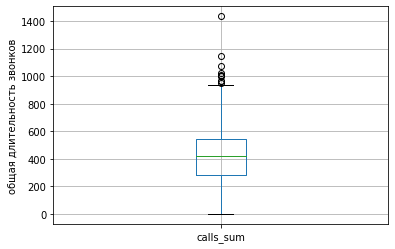

In [61]:
df_smart.boxplot('calls_sum')
plt.ylabel('общая длительность звонков')

Text(0, 0.5, 'общая длительность звонков')

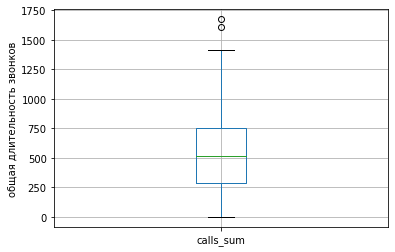

In [62]:
df_ultra.boxplot('calls_sum')
plt.ylabel('общая длительность звонков')

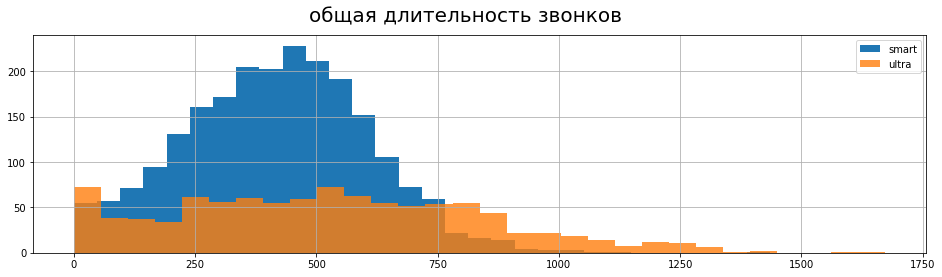

In [63]:
df_smart.calls_sum.hist(bins = 30, figsize = (16, 4))
df_ultra.calls_sum.hist(bins = 30, figsize = (16, 4), alpha = 0.8)
plt.suptitle('общая длительность звонков', size = 20)
plt.legend(['smart', 'ultra'])

Text(0, 0.5, 'количество сообщений')

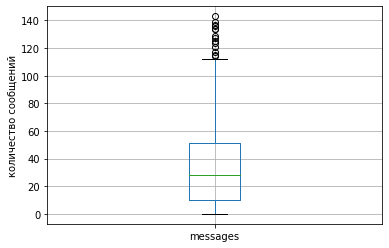

In [64]:
df_smart.boxplot('messages')
plt.ylabel('количество сообщений')

Text(0, 0.5, 'количество сообщений')

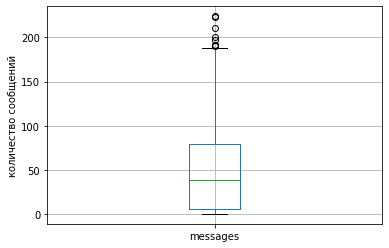

In [65]:
df_ultra.boxplot('messages')
plt.ylabel('количество сообщений')

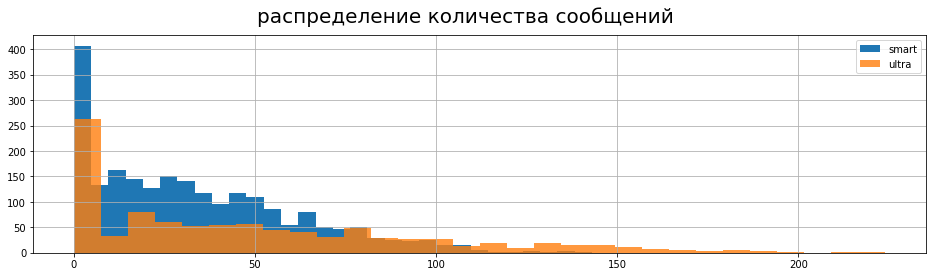

In [66]:
df_smart.messages.hist(bins = 30, figsize = (16, 4))
df_ultra.messages.hist(bins = 30, figsize = (16, 4), alpha = 0.8)
plt.suptitle('распределение количества сообщений', size = 20)
plt.legend(['smart', 'ultra'])

<div class="alert alert-info"> 

v1
    
* добавлены подписи к осям y на boxplot
    
* добавлены заголовки гистограмм
    
* гистограммы объеденены для наглядности
</div>

Text(0, 0.5, 'объём потраченного интернет-трафика')

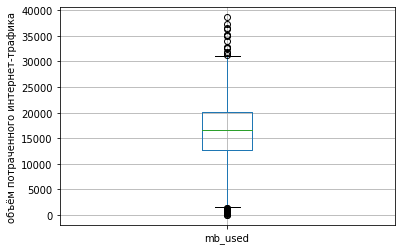

In [67]:
df_smart.boxplot('mb_used')
plt.ylabel('объём потраченного интернет-трафика')

Text(0, 0.5, 'объём потраченного интернет-трафика')

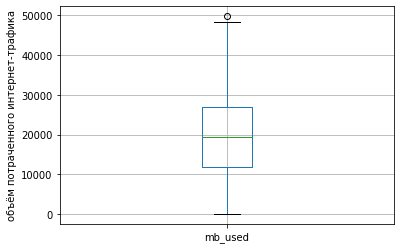

In [68]:
df_ultra.boxplot('mb_used')
plt.ylabel('объём потраченного интернет-трафика')

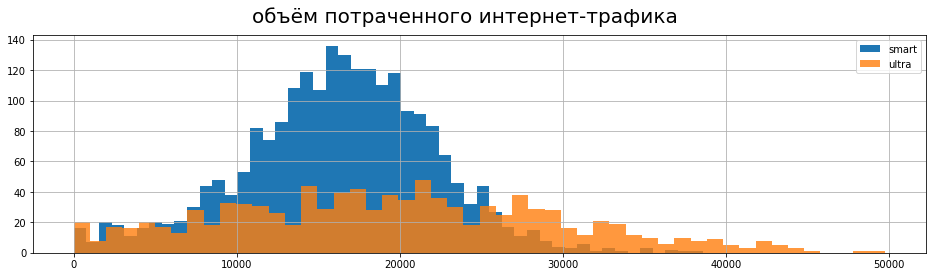

In [69]:
df_smart.mb_used.hist(bins = 50, figsize = (16, 4))
df_ultra.mb_used.hist(bins = 50, figsize = (16, 4),alpha = 0.8)
plt.suptitle('объём потраченного интернет-трафика', size = 20)
plt.legend(['smart', 'ultra'])

###### Вывод

1. Среднее количество звонков, сообщений и объема трафика на тарифе **«ultra»** больше, чем на тарифе **«smart»** - объясняется тем, что бесплатный лимит больше за счет стоимости тарифа. Абонентам на тарифе **«ultra»** требуется в среднем более 500 минут разговоров, на на тарифе **«smart»** - менее 420, сообщений - 33 и 49, интернет-трафика - 16гБ и 19гБ 


2. Дисперсия и Стандартное отклонение указывают на бOльший разброс значений на тарифе **«ultra»** по сравнениюс тарифом **«smart»**


3. Распределение на гистограмме

    3.1 Звонки. Длительность звонков на тарифе **«smart»** ближе к нормальному, смещено влево и большинство значений в районе 400 - 500 минут, тогда как на тарифе **«ultra»** нет четкого фокуса и большинство значений распределено от 0 до 900 минут

    3.2 Сообщения. Характер распределения на обоих тарифах однаковый - от пика возле 0 с ростом количества сообщений количество таких случаев падает. Причем на тарифе **«smart»** отправкой сообщений пользуются чаще в 2-3 раза

    3.3 Интернет-трафик. По характеру распределения относительно 2х тарифов напоминает распределение по количеству минут звонков. На тарифе **«smart»** большинство вбонентов расходует порядка 10-20гБ, а на тарифе **«ultra»** - 15-25.

<a name="4"></a>
[Назад к оглавлению](#0)

## 4. Проверка гипотез

### 4.1 Cредняя выручка пользователей тарифов «ultra» и «smart» различается

Будем проверять нулевую и альтернативную гипотезы:

* нулевая гипотеза H0 - cредняя выручка пользователей тарифов «smart» и «ultra» не отличаются друг от друга

* альтернативная гипотеза H1 - cредняя выручка пользователей тарифов «smart» и «ultra» значимо различны

Пороговое значение alpha устанавливаем .05% - порог вероятности крайнего, маловероятного события, т.е., если вероятность ниже, то принято считать, что событие маловероятно

In [70]:
alpha = .05

df_smart.revenue - выручка пользователей тарифа **«smart»**

df_ultra.revenue - выручка пользователей тарифа **«ultra»**

results_1 - результат проверки

Для проверки гипотезы используем метод ttest_ind из пакета scipy.stats. P-value — второе значение в массиве, выдаваемом методом ttest_ind. 

К нему обратимся по имени: results.pvalue. 

Если окажется, что значение results_1.pvalue больше alpha, то подтверждаем гипотезу о равенстве средней выручки пользователей тарифов 

In [71]:
results_1 = st.ttest_ind(df_smart.revenue, df_ultra.revenue)
results_1

Ttest_indResult(statistic=-31.559679271872707, pvalue=1.1875821089086472e-190)

In [72]:
print('p-значение:', results_1.pvalue)
if results_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1875821089086472e-190
Отвергаем нулевую гипотезу


### 4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Будем проверять нулевую и альтернативную гипотезы:

* нулевая гипотеза H0 - cредняя выручка пользователей из Москвы и пользователей из других регионов не отличаются друг от друга

* альтернативная гипотеза H1 - cредняя выручка пользователей из Москвы и пользователей из других регионов значимо различны

Методика как в предыдущей проверке

In [73]:
alpha = .05

In [74]:
df_moscow = df.query('city == "Москва"')

In [75]:
df_another = df.query('city != "Москва"')

df_moscow.revenue - средняя выручка пользователей из Москвы 

df_another.revenue - средняя выручка пользователей из других регионов

Если окажется, что значение results_2.pvalue больше alpha, то подтверждаем гипотезу о равенстве выручки пользователей из Москвы и выручки пользователей из других регионов 

In [76]:
results_2 = st.ttest_ind(df_moscow.revenue, df_another.revenue)
results_2

Ttest_indResult(statistic=0.7156025264433984, pvalue=0.4742888281951969)

In [77]:
print('p-значение:', results_2.pvalue)
if results_2.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4742888281951969
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info"> 

v1
    
* нулевая и альтернативная гипотезы сформулированы и вынесены в начало проверки
</div>

рассчет выручки по месяцам

In [78]:
df_smart_revenue = df_smart.pivot_table(index='month_date', values='revenue', aggfunc='sum').reset_index()

In [79]:
df_ultra_revenue = df_ultra.pivot_table(index='month_date', values='revenue', aggfunc='sum').reset_index()

In [80]:
df_revenue = df_smart_revenue.merge(df_ultra_revenue, on = 'month_date', how = 'outer')

In [81]:
df_revenue.columns = ['month_date', 'smart', 'ultra']

In [82]:
df_revenue[['smart', 'ultra']] = df_revenue[['smart', 'ultra']].astype(int)

<a name="5"></a>
[Назад к оглавлению](#0)

## 5. Вывод

In [83]:
df_revenue

,month_date,smart,ultra
0,2018-01-01,23887,17550
1,2018-02-01,46651,47353
2,2018-03-01,86114,74154
3,2018-04-01,103300,109747
4,2018-05-01,161711,137683
5,2018-06-01,188531,170691
6,2018-07-01,234780,191872
7,2018-08-01,295746,221613
8,2018-09-01,311772,231576
9,2018-10-01,383625,252999


1. Cредняя выручка пользователей тарифов «smart» и «ultra» различается

2. Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

3. **Сумарная выручка по месяцам показывает, что тарифный «smart» перспективнее и выгоднее, чем «ultra»**